# What are word embeddings?

Our relationship is troubled! We like **words**, but computers like **math**. Word embeddings are a way of bridging that gap (and saving our love!).

<p class="reading-options">
  <a class="btn" href="/text-analysis/word-embeddings">
    <i class="fa fa-sm fa-book"></i>
    Read online
  </a>
  <a class="btn" href="/text-analysis/notebooks/Word embeddings.ipynb">
    <i class="fa fa-sm fa-download"></i>
    Download notebook
  </a>
  <a class="btn" href="https://colab.research.google.com/github/littlecolumns/ds4j-notebooks/blob/master/text-analysis/notebooks/Word embeddings.ipynb" target="_new">
    <i class="fa fa-sm fa-laptop"></i>
    Interactive version
  </a>
</p>

## The problem

You know how when we look at a crazy math formula, maybe our brain explodes a little?

\begin{equation*}
\left( \sum_{k=1}^n a_k b_k \right)^2 \leq \left( \sum_{k=1}^n a_k^2 \right) \left( \sum_{k=1}^n b_k^2 \right)
\end{equation*}

Yeah, **that's exactly how computers feel when you use words.** In the same way we might say "that weird angry capital E thing" to refer to Σ, computers look at the word "cat" and is like "uh, `0x63` `0x61` `0x74`?"

While software might be able to understand that `cat` is three letters long, it's a `c` and an `a` and a `t`, and look up the definition in a dictionary for us, _the computer doesn't really emotionally know what cats are_. It can't _feel_ what a cat is, know about its fur or how it meows, know about how it sleeps in the sun or tears apart our furniture or cruelly makes us take it to the vet on Christmas Day.

Word embeddings are a way of bridging that gap, a way of using math to describe all of those delightful/horrible things about cats (and everything else).

## An axis of meaning

Let's say we have the concept of a cat. Everything we know about a cat, thrown down on the screen, all of it sitting inside a little pink dot. **We'll make it look computational so the computer doesn't get scared yet.**

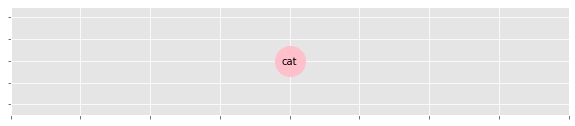

In [3]:
import matplotlib.pyplot as plt

plt.style.use('ggplot')

fig, ax = plt.subplots(figsize=(10,2))
ax.get_xaxis().set_ticklabels([])
ax.get_yaxis().set_ticklabels([])

ax.set_xlim(-1, 1)
ax.set_ylim(-0.5, 0.5)

ax.text(0, 0, 'cat', ha='center', va='center')
ax.plot(0, 0, marker='o', markersize=30, color='pink')

So far so good! Cats don't exist in the world by themselves, though, they exist in *relation to other things*. Like dogs, for exampe. Dogs are different than cats, so they should go... somewhere on the other side from cats, I guess?

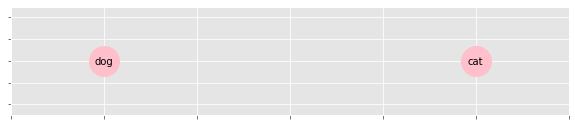

In [4]:
import matplotlib.pyplot as plt

plt.style.use('ggplot')

fig, ax = plt.subplots(figsize=(10,2))
ax.get_xaxis().set_ticklabels([])
ax.get_yaxis().set_ticklabels([])

ax.set_xlim(-0.5, 2.5)
ax.set_ylim(-0.5, 0.5)

datapoints = [
    [2, 0, 'cat'],
    [0, 0, 'dog']
]

for data in datapoints:
    ax.text(data[0], data[1], data[2], ha='center', va='center')
    ax.plot(data[0], data[1], marker='o', markersize=30, color='pink')

Cool, great, amazing, wonderful.

It makes makes as much sense as something meaningless can, but it doesn't seem very much like math. Let's add an **axis label** to explain to the computer what's changing between "dog" on the left and "cat" on the right.

Text(1, -0.35, 'Less catlike')

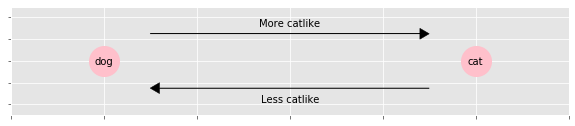

In [5]:
import matplotlib.pyplot as plt

plt.style.use('ggplot')

fig, ax = plt.subplots(figsize=(10,2))
ax.get_yaxis().set_ticklabels([])
ax.get_xaxis().set_ticklabels([])

ax.set_xlim(-0.5, 2.5)
ax.set_ylim(-0.5, 0.5)

datapoints = [
    [2, 0, 'cat'],
    [0, 0, 'dog']
]

for data in datapoints:
    ax.text(data[0], data[1], data[2], ha='center', va='center')
    ax.plot(data[0], data[1], marker='o', markersize=30, color='pink')

ax.arrow(0.25, 0.25, 1.5, 0, head_width=0.1, head_length=0.05, fc='k', ec='k', length_includes_head=True)
ax.text(1, 0.35, 'More catlike', ha='center', va='center')

ax.arrow(1.75, -0.25, -1.5, 0, head_width=0.1, head_length=0.05, fc='k', ec='k', length_includes_head=True)
ax.text(1, -0.35, 'Less catlike', ha='center', va='center')

If we count those little lines as points, we can see that `cat` is four points more catlike than `dog`. **That's math!** We can even put it into a pandas dataframe:

In [8]:
import pandas as pd

pd.DataFrame([
    { 'name': 'cat', 'cat_points': 4 },
    { 'name': 'dog', 'cat_points': 0 }
])

name  cat_points
0  cat           4
1  dog           0

There are more animals than just cats and dogs, though, so **let's add 'em!** How about... **a lion?**

Lions are pretty catlike, but they're bigger and stronger and more powerful than most of the housecats that live with me (no offense). So we can give them a little fewer cat points than cats, but definitely not as far over as dogs.

Text(1, -0.35, 'Less catlike')

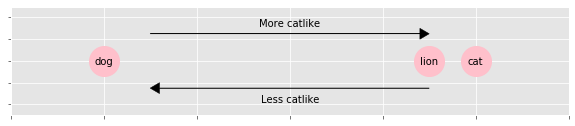

In [9]:
import matplotlib.pyplot as plt

plt.style.use('ggplot')

fig, ax = plt.subplots(figsize=(10,2))
ax.get_yaxis().set_ticklabels([])
ax.get_xaxis().set_ticklabels([])

ax.set_xlim(-0.5, 2.5)
ax.set_ylim(-0.5, 0.5)

datapoints = [
    [2, 0, 'cat'],
    [0, 0, 'dog'],
    [1.75, 0, 'lion']
]

for data in datapoints:
    ax.text(data[0], data[1], data[2], ha='center', va='center')
    ax.plot(data[0], data[1], marker='o', markersize=30, color='pink')

ax.arrow(0.25, 0.25, 1.5, 0, head_width=0.1, head_length=0.05, fc='k', ec='k', length_includes_head=True)
ax.text(1, 0.35, 'More catlike', ha='center', va='center')

ax.arrow(1.75, -0.25, -1.5, 0, head_width=0.1, head_length=0.05, fc='k', ec='k', length_includes_head=True)
ax.text(1, -0.35, 'Less catlike', ha='center', va='center')

And again, because computers love spreadsheets and counting, we can make another dataframe.

In [10]:
pd.DataFrame([
    { 'name': 'cat', 'cat_points': 4 },
    { 'name': 'dog', 'cat_points': 0 },
    { 'name': 'lion', 'cat_points': 3.5 }
])

name  cat_points
0   cat         4.0
1   dog         0.0
2  lion         3.5

I've heard rumors of _even more animals_, so let's keep going. How about **wolves?**

A wolf is definitely much closer to a dog than to a cat. Since a wolf is more intimidating than a dog, I think it's even _further away_ than dog is.

Text(1, -0.35, 'Less catlike')

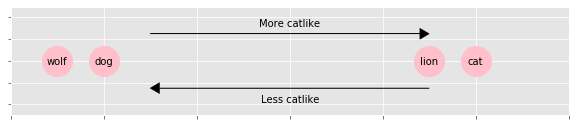

In [11]:
import matplotlib.pyplot as plt

plt.style.use('ggplot')

fig, ax = plt.subplots(figsize=(10,2))
ax.get_yaxis().set_ticklabels([])
ax.get_xaxis().set_ticklabels([])

ax.set_xlim(-0.5, 2.5)
ax.set_ylim(-0.5, 0.5)

datapoints = [
    [2, 0, 'cat'],
    [0, 0, 'dog'],
    [1.75, 0, 'lion'],
    [-0.25, 0, 'wolf']
]

for data in datapoints:
    ax.text(data[0], data[1], data[2], ha='center', va='center')
    ax.plot(data[0], data[1], marker='o', markersize=30, color='pink')

ax.arrow(0.25, 0.25, 1.5, 0, head_width=0.1, head_length=0.05, fc='k', ec='k', length_includes_head=True)
ax.text(1, 0.35, 'More catlike', ha='center', va='center')

ax.arrow(1.75, -0.25, -1.5, 0, head_width=0.1, head_length=0.05, fc='k', ec='k', length_includes_head=True)
ax.text(1, -0.35, 'Less catlike', ha='center', va='center')

And just so the computer won't feel left out, we can put it into a dataframe to make it nice and math-y.

In [12]:
pd.DataFrame([
    { 'name': 'cat', 'cat_points': 4 },
    { 'name': 'dog', 'cat_points': 0 },
    { 'name': 'lion', 'cat_points': 3.5 },
    { 'name': 'wolf', 'cat_points': -0.5 }
])

name  cat_points
0   cat         4.0
1   dog         0.0
2  lion         3.5
3  wolf        -0.5

## Another dimension

We've all been to the zoo, we're all animal scientists, we've all watched [Beastars](https://myanimelist.net/anime/39195/Beastars), and we're all  _very very angry_ at this classification. **Why are wolves and lions separated by dogs?** How does that make _any_ sense?

Sure, lions and cats are both felines, and wolves and dogs are both canines, but let's think about it:

* Cats: totally domesticated
* Dogs: totally domesticated
* Wolves: totally wild
* Lions: totally wild

If we're teaching our computer with just "hey this is like a cat" or "hey this is less like a cat" it isn't going to learn _anything important_. **This is the nuance of our human experience of the world that computers are missing out on!**

It's this nuance we're going to teach _right now_ by giving our graph a brand new axis: **wild or domesticated.**

Text(-0.55, 1, 'More wild')

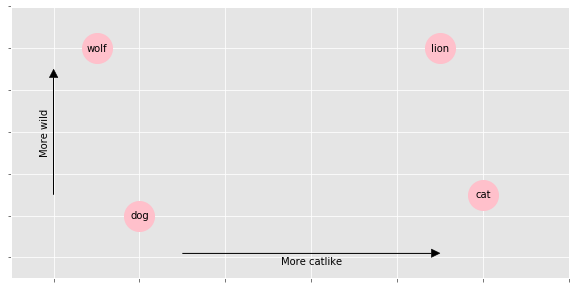

In [13]:
import matplotlib.pyplot as plt

plt.style.use('ggplot')

fig, ax = plt.subplots(figsize=(10,5))
ax.get_yaxis().set_ticklabels([])
ax.get_xaxis().set_ticklabels([])

ax.set_xlim(-0.75, 2.5)
ax.set_ylim(-0.75, 2.5)

datapoints = [
    [2, 0.25, 'cat'],
    [0, 0, 'dog'],
    [1.75, 2, 'lion'],
    [-0.25, 2, 'wolf']
]

for data in datapoints:
    ax.text(data[0], data[1], data[2], ha='center', va='center')
    ax.plot(data[0], data[1], marker='o', markersize=30, color='pink')

ax.arrow(0.25, -0.45, 1.5, 0, head_width=0.1, head_length=0.05, fc='k', ec='k', length_includes_head=True)
ax.text(1, -0.55, 'More catlike', ha='center', va='center')



ax.arrow(-0.5, 0.25, 0, 1.5, head_width=0.05, head_length=0.1, fc='k', ec='k', length_includes_head=True)
ax.text(-0.55, 1, 'More wild', ha='center', va='center', rotation=90)

Look at that beauty!!! It's explaining **everything I could ever want.** And just so we don't leave out the computer:

In [14]:
pd.DataFrame([
    { 'name': 'cat', 'cat_points': 4, 'wildness': 0.5 },
    { 'name': 'dog', 'cat_points': 0, 'wildness': 0 },
    { 'name': 'lion', 'cat_points': 3.5, 'wildness': 4 },
    { 'name': 'wolf', 'cat_points': -0.5, 'wildness': 4 }
])

name  cat_points  wildness
0   cat         4.0       0.5
1   dog         0.0       0.0
2  lion         3.5       4.0
3  wolf        -0.5       4.0

This is an excellent graph, and it's an excellent (if not perfect) way to describe all sorts of animals! We can describe a few just for fun:

* Tigers (basically where lions are)
* Killer whales (not catlike at all, pretty wild)
* Worms (very very not catlike, a little wild)

We keep putting numbers in that chart, and the computer keeps having a better and better idea of what animals are similar to what other animals. Eventually it builds up a whole worldview of how catlike things are, and how wild they are, and then it can probably analyze something very complicated about zoology!

There's a problem lurking around the corner, though, and it's this: **our computer is interested in things that aren't animals.**

## A third dimension

We were feeling good for a hot second, but then we realized things other than animals existed. Like **shoes**, for example.

Text(-6.45, 1, 'More wild')

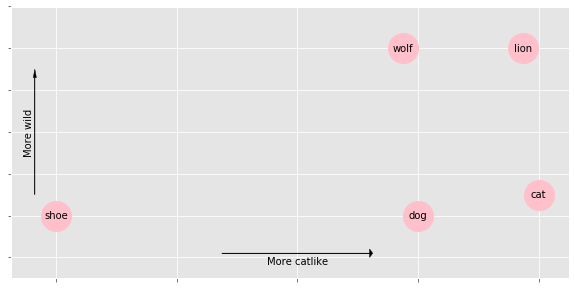

In [15]:
import matplotlib.pyplot as plt

plt.style.use('ggplot')

fig, ax = plt.subplots(figsize=(10,5))
ax.get_yaxis().set_ticklabels([])
ax.get_xaxis().set_ticklabels([])

ax.set_xlim(-6.75, 2.5)
ax.set_ylim(-0.75, 2.5)

datapoints = [
    [2, 0.25, 'cat'],
    [0, 0, 'dog'],
    [-6, 0, 'shoe'],
    [1.75, 2, 'lion'],
    [-0.25, 2, 'wolf']
]

for data in datapoints:
    ax.text(data[0], data[1], data[2], ha='center', va='center')
    ax.plot(data[0], data[1], marker='o', markersize=30, color='pink')

ax.arrow(-3.25, -0.45, 2.5, 0, head_width=0.1, head_length=0.05, fc='k', ec='k', length_includes_head=True)
ax.text(-2, -0.55, 'More catlike', ha='center', va='center')

ax.arrow(-6.35, 0.25, 0, 1.5, head_width=0.05, head_length=0.1, fc='k', ec='k', length_includes_head=True)
ax.text(-6.45, 1, 'More wild', ha='center', va='center', rotation=90)

Shoes aren't like cats at all and are not very wild. But _that doesn't do a good job describing them at all_. It's like when we added wolves and lions and needed a new axis.

So what are we going to do? **The exact same thing: add another piece of data to it!** We'll call this axis something like "things you can wear."

In [16]:
df = pd.DataFrame([
    { 'name': 'cat', 'cat_points': 4, 'wildness': 0.5, 'wearability': 0.5 },
    { 'name': 'dog', 'cat_points': 0, 'wildness': 0, 'wearability': 0.25  },
    { 'name': 'lion', 'cat_points': 3.5, 'wildness': 4, 'wearability': -1  },
    { 'name': 'wolf', 'cat_points': -0.5, 'wildness': 4, 'wearability': -1  },
    { 'name': 'shoe', 'cat_points': -3.5, 'wildness': 0, 'wearability': 3  }
])
df

name  cat_points  wildness  wearability
0   cat         4.0       0.5         0.50
1   dog         0.0       0.0         0.25
2  lion         3.5       4.0        -1.00
3  wolf        -0.5       4.0        -1.00
4  shoe        -3.5       0.0         3.00

And while two dimensions was all right, plotting this in three should really get our blood pumping! We're going to use a library called **plotly** to take care of this for us.

In [29]:
import plotly.graph_objects as go
import plotly.io as pio

pio.renderers.default = 'notebook'

fig = go.Figure(data=go.Scatter3d(
    x=df.cat_points,
    y=df.wildness,
    z=df.wearability,
    text=df.name,
    mode='markers + text',
    marker=dict(
        color = 'pink',
    )
))

fig.update_layout(scene = dict(
                    xaxis_title='cat points',
                    yaxis_title='wildness',
                    zaxis_title='wearability'
                 ))

pio.show(fig)

## Word embeddings

Now take this idea, and expand it into more and more and more dimensions. Is this word about _houses?_ Is it about _fish_ or _space_ or is it something you can _sit on_ or _find in a treasure chest_ or _breathe?_

**That's what word embeddings are.** Things like [GLoVe](https://nlp.stanford.edu/projects/glove/) or [word2vec](https://en.wikipedia.org/wiki/Word2vec) are many many many dimensions of knowledge, about many many many words. They basically forced a computer to read Wikipedia until it realized how everything was related.

Is that exactly how it worked? No, just _kind of_. Can we use word embeddings without knowing how they work? Definitely!

### Showing off

We're going to use the [spaCy](http://spacy.io/) library in order to show off how this weird example of cats and dogs and shoes and stuff _actually kind of works_. First we'll import spacy and load in the database of word embeddings (fair warning, it's a lot of stuff, it might take up to a minute).

In [31]:
import spacy

nlp = spacy.load("en_core_web_md")

For each of the 1.3 million words in the database, it has **300 dimensions of information.** The dimensions aren't broken down into "catlike" or "wearable," unfortunately, but 300 dimensions of data is a heck of a lot of nuance to carry around.

To see what it can do, we're going to pick a few words that we're interested in. Because we can't graph all 300 dimensions at once, we're going to use some magic machine learning stuff called [PCA](https://en.wikipedia.org/wiki/Principal_component_analysis) to reduce it to 3 dimensions.

> How does the "going from 300 dimensions to 3 dimensions" trick work? Later on you can [read something like this](https://towardsdatascience.com/a-one-stop-shop-for-principal-component-analysis-5582fb7e0a9c).

We're going to go with elements with a few patterns - cats and kittens, dogs and puppies, and then our good friend shoe.

In [32]:
from sklearn.decomposition import PCA

words = ['cat', 'kitten', 'dog', 'puppy', 'shoe']
X = [nlp(word).vector for word in words]

pca = PCA(n_components=3)
pca.fit(X)

transformed = pca.transform(X)
df = pd.DataFrame(transformed, columns=['x', 'y', 'z'])
df['word'] = words
df

x         y         z    word
0 -1.388262 -2.104630 -1.753189     cat
1 -1.305184 -2.062685  1.843480  kitten
2 -1.475557  1.811804 -1.735215     dog
3 -2.146706  2.105458  1.533496   puppy
4  6.315708  0.250052  0.111429    shoe

Our x, y and z dimensions don't necessarily _mean anything_, but once we graph them we'll see some **patterns emerge**.

In [33]:
import plotly.express as px

fig = px.scatter_3d(df, x='x', y='y', z='z', text='word')
fig.show()

Click and drag to move it around and explore!

Notice how **shoe is really far from all the animals,** cat/kitten is separate from dog/puppy, and (most excitingly) how the relationship between cat and kitten is **the same as dog and puppy!** Fun, right?

While not all examples are as cut-and-dried as this, this is the general idea behind word embeddings. Instead of having a computer say "a cat is a cat and a lion is a lion and a dog is a dog," every word gets a bunch of ratings -whether it's catlike, how wild it is, whether it's wearable, things like that - which the computer can then use to see what words and concepts are related to each other.

## Review

In this section we looked at **word embeddings**, which are ways of **teaching computers nuance about words and concepts.** Words are scored on many, many fields - 300 dimensions, in the case of word2vec - and these scores can be used to compare and contrast the words with one another.

These word embeddings (the official name for the collection of scores) were created automatically by having the computer "read" large texts like Wikipedia. While the embeddings are machine-generated categories and not human-defined, we saw from the final example that they can be reduced into something that makes sense to real people.

## Discussion topics

TODO